In [2]:
import os
import sys
import numpy as np
import pandas as pd

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
sys.path.insert(0, '../')
%load_ext autoreload
%autoreload 2

pd.options.mode.chained_assignment = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from src.features.build_features import FeatureDataset

In [5]:
path_to_csv = os.path.join("..", "data", "MSFT.csv")
df = pd.read_csv(path_to_csv)
print(df.shape)
df.head()


(1806, 6)


,Date,Open,High,Low,Close,Volume
0,2015-01-02,41.020916,41.689065,40.915420,41.108829,27913900
1,2015-01-05,40.765972,41.082464,40.660475,40.730808,39673900
2,2015-01-06,40.774768,41.100050,40.036285,40.132992,36447900
3,2015-01-07,40.423112,40.845102,39.992333,40.642899,29114100
4,2015-01-08,41.100042,41.979187,41.073668,41.838524,29645200


In [6]:
windows = [10, 20, 50, 100]
bollinger_bands_window = 20

df = FeatureDataset(
    df,
    windows=windows,
    bollinger_bands_window=bollinger_bands_window
).build()

/workspaces/Stock-Trading/notebooks/../src/features/build_features.py:71: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.windows = windows
/workspaces/Stock-Trading/notebooks/../src/features/build_features.py:72: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.dataframe = dataframe


In [7]:
df

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50,MA 100,log_returns,bollinger_up,bollinger_down
Date,,,,,,,,,,,,
2015-01-02,41.020916,41.689065,40.915420,41.108829,27913900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,40.765972,41.082464,40.660475,40.730808,39673900,NaN,NaN,NaN,NaN,-0.009196,NaN,NaN
2015-01-06,40.774768,41.100050,40.036285,40.132992,36447900,NaN,NaN,NaN,NaN,-0.014677,NaN,NaN
2015-01-07,40.423112,40.845102,39.992333,40.642899,29114100,NaN,NaN,NaN,NaN,0.012705,NaN,NaN
2015-01-08,41.100042,41.979187,41.073668,41.838524,29645200,NaN,NaN,NaN,NaN,0.029418,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,294.309998,299.140015,293.000000,298.790009,34585700,293.108130,298.965422,309.771720,316.611407,0.004978,315.804830,282.126014
2022-03-01,296.399994,299.970001,292.149994,294.950012,31217800,293.164001,298.196007,309.186129,316.641197,-0.012852,314.234629,282.157385
2022-03-02,295.359985,301.470001,293.700012,300.190002,31873000,293.198001,297.799362,308.727292,316.706055,0.017766,313.183318,282.415406


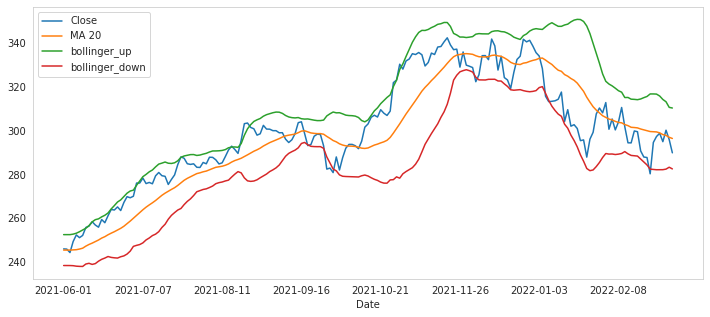

In [8]:
df['2021-06-01':][['Close', 'MA 20', 'bollinger_up', 'bollinger_down']].plot(subplots=False, figsize=(12,5)).grid(False)

## Create Buy / Sell Signals

In [9]:
df['buy_signal'] = np.where(df.bollinger_down > df.Close, True, False)
df['sell_signal'] = np.where(df.bollinger_up < df.Close, True, False)
df.dropna()

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50,MA 100,log_returns,bollinger_up,bollinger_down,buy_signal,sell_signal
Date,,,,,,,,,,,,,,
2015-05-27,41.723926,42.570525,41.545694,42.427940,27335600,42.338470,42.314845,39.512363,39.109761,0.021893,43.570764,41.058926,False,False
2015-05-28,42.329912,42.793313,42.231884,42.285355,19283700,42.349836,42.257222,39.619645,39.121527,-0.003361,43.396540,41.117903,False,False
2015-05-29,42.267541,42.392303,41.518970,41.759583,36519600,42.212116,42.191903,39.702245,39.131814,-0.012434,43.284846,41.098960,False,False
2015-06-01,41.937807,42.570527,41.545696,42.089302,28837300,42.144555,42.142186,39.795158,39.151377,0.007896,43.151603,41.132769,False,False
2015-06-02,41.821955,42.196239,41.545696,41.813042,21498300,42.075045,42.097249,39.872098,39.163079,-0.006564,43.079555,41.114943,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,294.309998,299.140015,293.000000,298.790009,34585700,293.108130,298.965422,309.771720,316.611407,0.004978,315.804830,282.126014,False,False
2022-03-01,296.399994,299.970001,292.149994,294.950012,31217800,293.164001,298.196007,309.186129,316.641197,-0.012852,314.234629,282.157385,False,False
2022-03-02,295.359985,301.470001,293.700012,300.190002,31873000,293.198001,297.799362,308.727292,316.706055,0.017766,313.183318,282.415406,False,False


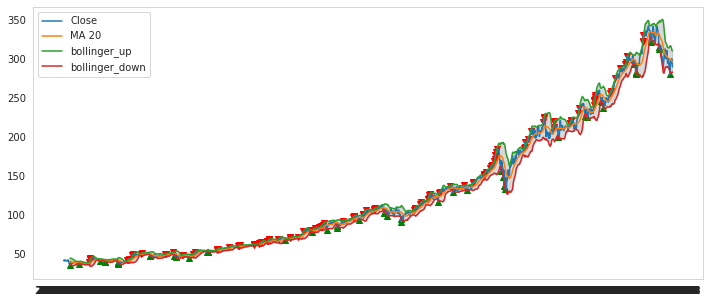

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df[['Close', 'MA 20', 'bollinger_up', 'bollinger_down']])
plt.legend(['Close', 'MA 20', 'bollinger_up', 'bollinger_down'])
plt.fill_between(df.index, df.bollinger_up, df.bollinger_down, color="grey", alpha=0.3)
plt.grid(False)

plt.scatter(df.index[df.buy_signal], df[df.buy_signal].Close, marker='^', color="green")
plt.scatter(df.index[df.sell_signal], df[df.sell_signal].Close, marker='v', color="red")

x = plt.show()


Problem: We have multiple selling and buying signals. Therefore we mus look if we already have the position, if yes we will not buy it a second time.

In [11]:
buys = []
sells = []
open_pos = False

for i in range(len(df)):
    if df.bollinger_down[i] > df.Close[i]:
        if open_pos == False:
            buys.append(i)
            open_pos = True
    elif df.bollinger_up[i] < df.Close[i]:
        if open_pos:
            sells.append(i)
            open_pos = False

In [12]:
buys

[19,
 107,
 255,
 328,
 373,
 425,
 656,
 736,
 781,
 877,
 950,
 1110,
 1154,
 1195,
 1296,
 1466,
 1547,
 1594,
 1690,
 1743]

In [13]:
sells

[76,
 189,
 302,
 351,
 383,
 455,
 670,
 745,
 827,
 887,
 1040,
 1114,
 1186,
 1213,
 1366,
 1500,
 1572,
 1620,
 1717]

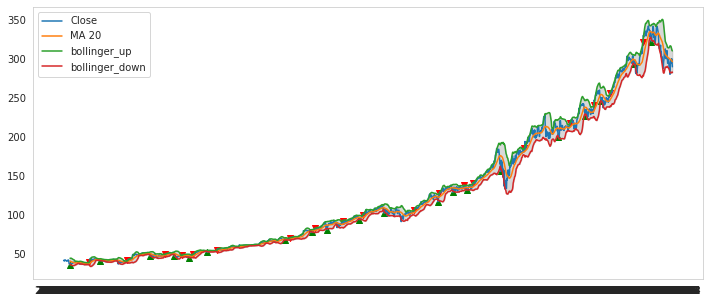

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(df[['Close', 'MA 20', 'bollinger_up', 'bollinger_down']])
plt.legend(['Close', 'MA 20', 'bollinger_up', 'bollinger_down'])
plt.fill_between(df.index, df.bollinger_up,
                 df.bollinger_down, color="grey", alpha=0.3)
plt.grid(False)

plt.scatter(df.iloc[buys].index,
            df.iloc[buys].Close, marker='^', color="green")

plt.scatter(df.iloc[sells].index,
            df.iloc[sells].Close, marker='v', color="red")

x = plt.show()


## Back-Test the strategy

In [15]:
back_test = pd.concat([df.iloc[buys].Close, df.iloc[sells].Close], axis=1).sort_index()
back_test.columns = ['Buys', 'Sells']
back_test

,Buys,Sells
Date,,
2015-01-30,35.517475,NaN
2015-04-23,NaN,38.373322
2015-06-08,40.752556,NaN
2015-10-02,NaN,40.877777
2016-01-07,47.113632,NaN
2016-03-16,NaN,49.434746
2016-04-22,47.097172,NaN
2016-05-25,NaN,47.737999
2016-06-27,44.358242,NaN


In [16]:
profit = back_test.shift(-1).Sells - back_test.Buys
profit.dropna()

Date
2015-01-30     2.855846
2015-06-08     0.125221
2016-01-07     2.321114
2016-04-22     0.640827
2016-06-27     4.378120
2016-09-09     3.179642
2017-08-10     2.811157
2017-12-04     5.473305
2018-02-08    10.919334
2018-06-27     6.365143
2018-10-10     4.027802
2019-06-03    11.244507
2019-08-05     9.075134
2019-10-02     9.310486
2020-02-27    30.150146
2020-10-28    16.951782
2021-02-25    13.252060
2021-05-04     9.962845
2021-09-20    28.757874
dtype: float64

In [18]:
relative_profit = (back_test.shift(-1).Sells - back_test.Buys) / back_test.Buys
relative_profit.dropna().mean() * 100

7.243686899318069